In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from tqdm import tqdm
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2
print(tf.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2.3.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cp "/content/drive/My Drive/data/bbcnews.csv" "bbcnews.csv"

In [4]:
import pandas as pd
df = pd.read_csv('bbcnews.csv')

In [5]:
def getLemmText(text):
 tokens=word_tokenize(text)
 lemmatizer = WordNetLemmatizer()
 tokens=[lemmatizer.lemmatize(word) for word in tokens]
 return " ".join(tokens)
df["text"] = list(map(getLemmText,df["text"]))

In [8]:
def getStemmText(text):
    tokens=word_tokenize(text)
    ps = PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]
    return ' '.join(tokens)
df['text'] = list(map(getStemmText,df['text']))

In [6]:
def remove_stops(row):
  my_list = row[df_baru['text'].values]
  meaningful_words = [w for w in my_list if not w in stops]
  return (meaningful_words)

In [7]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hand of viewer with home thea...,0,0,0,0,1
1,worldcom bos left book alone former worldcom b...,1,0,0,0,0
2,tiger wary of farrell gamble leicester say the...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raid box office ocean s twelve ...,0,1,0,0,0
...,...,...,...,...,...,...
2220,car pull down u retail figure u retail sale fe...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert u band rem ha...,0,1,0,0,0
2223,how political squabble snowball it s become co...,0,0,1,0,0


In [8]:
berita = df_baru['text'].values
label = df_baru[['politics', 'business', 'entertainment', 'sport', 'tech']].values

In [9]:
from sklearn.model_selection import train_test_split
berita_train, berita_test, label_train, label_test = train_test_split(berita, label, test_size=0.2)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(berita_train) 
tokenizer.fit_on_texts(berita_test)
 
sekuens_latih = tokenizer.texts_to_sequences(berita_train)
sekuens_test = tokenizer.texts_to_sequences(berita_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi pada training set dan validation set telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [12]:
num_epochs = 50
history = model.fit(padded_latih, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
56/56 - 217s - loss: 1.6055 - accuracy: 0.2230 - val_loss: 1.5986 - val_accuracy: 0.2067
Epoch 2/50
56/56 - 221s - loss: 1.5633 - accuracy: 0.3708 - val_loss: 1.3022 - val_accuracy: 0.4899
Epoch 3/50
56/56 - 226s - loss: 1.0537 - accuracy: 0.5472 - val_loss: 0.8053 - val_accuracy: 0.6045
Epoch 4/50
56/56 - 219s - loss: 0.6941 - accuracy: 0.6865 - val_loss: 0.8318 - val_accuracy: 0.6135
Epoch 5/50
56/56 - 217s - loss: 0.5179 - accuracy: 0.7607 - val_loss: 0.6392 - val_accuracy: 0.7056
Epoch 6/50
56/56 - 222s - loss: 0.4124 - accuracy: 0.8073 - val_loss: 0.6157 - val_accuracy: 0.7528
Epoch 7/50
56/56 - 219s - loss: 0.3312 - accuracy: 0.8640 - val_loss: 0.5694 - val_accuracy: 0.7888
Epoch 8/50
56/56 - 220s - loss: 0.1806 - accuracy: 0.9427 - val_loss: 0.5021 - val_accuracy: 0.8315
Epoch 9/50

Akurasi pada training set dan validation set telah mencapai >90%!
56/56 - 222s - loss: 0.0655 - accuracy: 0.9831 - val_loss: 0.3705 - val_accuracy: 0.9101


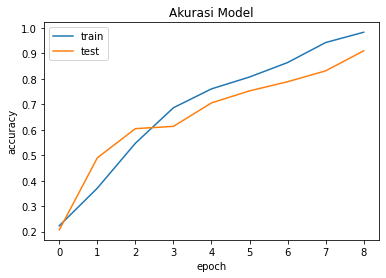

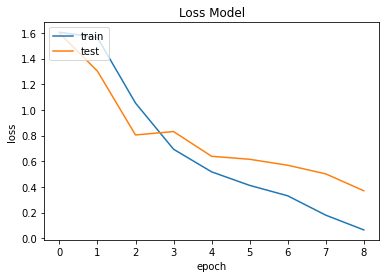

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()